In [1]:
import numpy as np
import h5py
import hdf5plugin
import MAS_library as MASL
import Pk_library as PKL
import matplotlib.pylab as plt

import readgadget
import readfof, readsubf
import sys, os, glob
sys.path.append('/home/jovyan/home/')
from utils import *
import yt
import shutil

In [2]:
f_snap = '/home/jovyan/L501P/1P_LC_0_50/groups_090/fof_subhalo_tab_090.0.hdf5'

In [3]:
# input files
snapdir = '/home/jovyan/L501P/1P_LC_0_50/' #folder hosting the catalogue
snapnum = 32                                            #redshift 0

new_dir = '/home/jovyan/home/Output/'+snapdir.split('/')[-2]
# os.mkdir(new_dir)
new_dir = new_dir +'/groups_'+str(snapnum).zfill(3)+'/'
# os.mkdir(new_dir)

for i in range(16):
    source = snapdir+'/groups_'+str(snapnum).zfill(3)+'/fof_subhalo_tab_'+str(snapnum).zfill(3)+'.'+str(i)+'.hdf5'
    destination = new_dir+'subhalo_tab_'+str(snapnum).zfill(3)+'.'+str(i) 
    dest = shutil.copyfile(source, destination)


# determine the redshift of the catalogue
z_dict = {90:0.0, 32:3.0}
redshift = z_dict[snapnum]

new_snapdir='/home/jovyan/home/Output/'+snapdir.split('/')[-2]
# read the halo catalogue
FoF = readsubf.subfind_catalog(new_snapdir, snapnum,masstab=True, swap=True)

# get the properties of the halos
pos_h = FoF.GroupPos/1e3            #Halo positions in Mpc/h
mass  = FoF.GroupMass*1e10          #Halo masses in Msun/h
vel_h = FoF.GroupVel*(1.0+redshift) #Halo peculiar velocities in km/s
Npart = FoF.GroupLen                #Number of CDM particles in the halo

ValueError: could not broadcast input array from shape (2541609,) into shape (218765834,)

In [5]:
# input files
snapdir = '/home/jovyan/L501P/1P_LC_0_50/' #folder hosting the catalogue
snapnum = 32    

k, Pk, _, _ = compute_halo_Pk_from_halo_catalog(snapdir, snapnum, threshold=1e10, W=False, verbose=False)

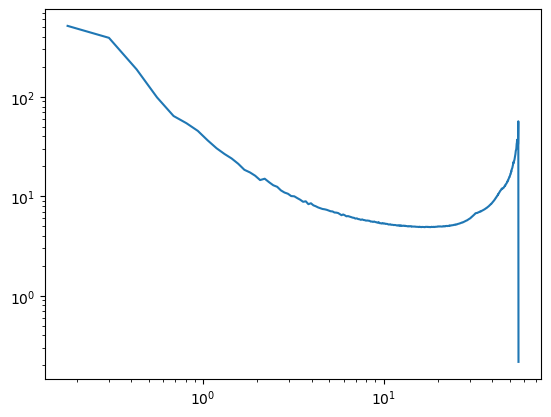

In [6]:
plt.loglog(k,Pk)

In [19]:
snaptype_dict={'EQ':"equil", 'LC':"local", 'OR_CMB':"ortho-CMB", 'OR_LSS':"ortho-LSS"}
for i in snaptype_dict:
    print(i)

EQ
LC
OR_CMB
OR_LSS


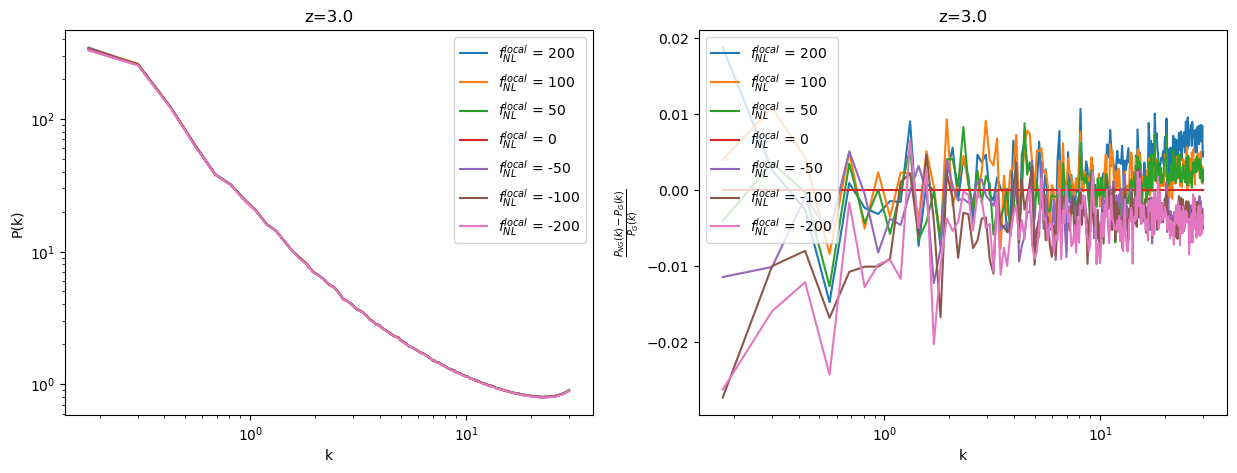

In [3]:
plot_halo_Pk(snaptype='LC', snapnum=32, kmax=30, verbose=False)

In [ ]:
data.keys()

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>

In [ ]:
data['Header'].attrs.keys()

<KeysViewHDF5 ['BoxSize', 'FlagDoubleprecision', 'Git_commit', 'Git_date', 'HubbleParam', 'Ngroups_ThisFile', 'Ngroups_Total', 'Nids_ThisFile', 'Nids_Total', 'Nsubgroups_ThisFile', 'Nsubgroups_Total', 'NumFiles', 'Omega0', 'OmegaLambda', 'Redshift', 'Time']>

In [ ]:
data['Subhalo']['SubhaloMass'][()]

array([1.6491666e+04, 1.0024094e+02, 9.3068993e+01, ..., 1.2976125e-01,
       1.2976125e-01, 1.2976125e-01], dtype=float32)

In [ ]:
data['Subhalo']['SubhaloPos'][()]

array([[29317.473 , 25154.525 ,  7067.7656],
       [29979.924 , 23524.383 ,  7867.947 ],
       [28298.488 , 25266.021 ,  7664.9233],
       ...,
       [42156.266 , 39162.47  , 29889.373 ],
       [43674.664 , 40768.33  , 29179.674 ],
       [43900.06  , 40255.31  , 29168.268 ]], dtype=float32)

In [ ]:
BoxSize

50.0

In [ ]:
data['Subhalo']['SubhaloVelDisp'][()]

array([492.66525 , 102.80691 , 101.401924, ...,  14.615211,   8.963798,
        11.911139], dtype=float32)

In [ ]:
data['Subhalo']['SubhaloVel'][()]

array([[  62.46493 ,   68.035835,   44.360664],
       [-256.996   ,  759.2742  , -277.65698 ],
       [-560.1101  ,  148.05612 ,  224.35094 ],
       ...,
       [  19.834896,  593.8534  , -217.63048 ],
       [  79.586555,  -31.870989,  457.88754 ],
       [-604.88837 , -351.62903 , -289.98315 ]], dtype=float32)

In [ ]:
data['Subhalo']['SubhaloSFR'][()]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

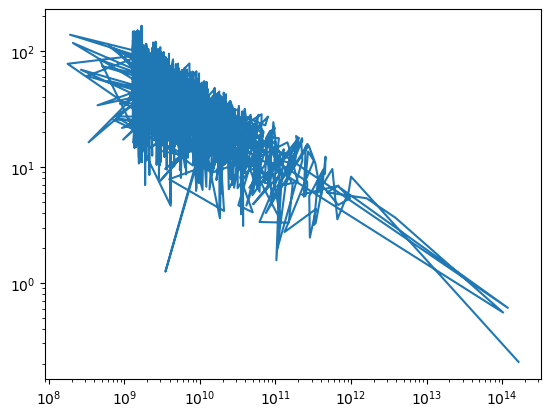

In [ ]:
plt.loglog(data['Subhalo']['SubhaloMass'][()]*1e10,np.sqrt((data['Subhalo']['SubhaloVel'][()]**2).sum(1))/data['Subhalo']['SubhaloVelDisp'][()])

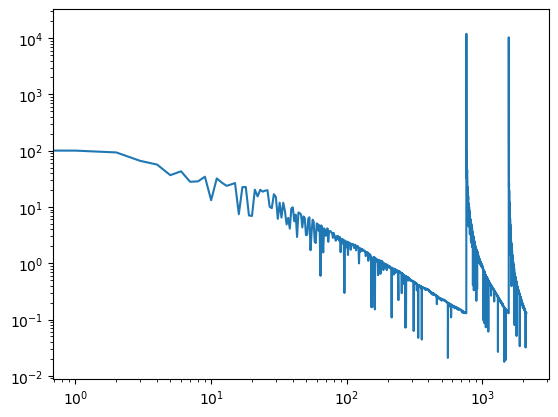

In [ ]:
plt.loglog(data['Subhalo']['SubhaloMass'][()])